<p>
<img src="http://www.cerm.unifi.it/chianti/images/logo%20unifi_positivo.jpg" 
        alt="UniFI logo" style="float: left; width: 20%; height: 20%;">
<div align="right">
Massimo Nocentini<br>
<small>
<br>October 25, 2016: class
</small>
</div>
</p>
<br>
<div align="center">
<b>Abstract</b><br>
Lecture notes of today (October 25, 2016) class in Python, about series expansion.
</div>

In [2]:
from sympy import *

init_printing()

In [24]:
t, m, i, k, n = symbols('t m i k n')
a, b = IndexedBase('a'), IndexedBase('b')

# one, one, one, one, one, one, one, one, one, one, one, one, ...

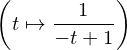

In [4]:
ones_fn = Lambda([t], 1/(1-t))
ones_fn

In [5]:
series(ones_fn(t), t, n=20)

In [6]:
help(series)

Help on function series in module sympy.series.series:

series(expr, x=None, x0=0, n=6, dir='+')
    Series expansion of expr around point `x = x0`.
    
    See the doctring of Expr.series() for complete details of this wrapper.



# convolutions

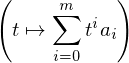

In [7]:
a_fn = Lambda([t], Sum(a[i]*t**i, (i, 0, m)))
a_fn

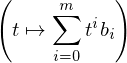

In [8]:
b_fn = Lambda([t], Sum(b[i]*t**i, (i, 0, m)))
b_fn

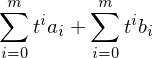

In [9]:
ab_sum = a_fn(t) + b_fn(t)
ab_sum

In [10]:
expanded_sum = ab_sum.subs({m:10}).doit()
expanded_sum

In [11]:
expanded_sum.collect(t)

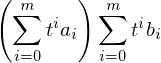

In [12]:
ab_prod = a_fn(t) * b_fn(t)
ab_prod

In [13]:
expanded_prod = ab_prod.subs({m:10}).doit()
expanded_prod

## a curious expansion

In [14]:
expanded_prod.expand()

In [15]:
complete_expansion = expanded_prod.expand().collect(t)
complete_expansion

In [16]:
complete_expansion.coeff(t, n=5)

## Not a pure convolution for terms $t^{i}$ where $i>10$

In [25]:
mv = 11

Compare this, obtained from previous expansion:

In [26]:
[complete_expansion.coeff(t, i)*t**i for i in range(mv, 21)]

with this, built manually according to the theory, focusing on $t^{11}$ only:

In [28]:
convolution = Sum(Sum(a[k]*b[n-k], (k, 0, n))*t**n, (n,0, m)).subs({m:mv}).doit()
convolution

## a nice system for inversions

Solve:

$$
a(t)\cdot b(t)=1
$$

assuming that you know function $a$, without loss of generality, since convolution is *symmetric*.

### implicit

In [58]:
eqs = [Eq(convolution.coeff(t, n=0), 1)] + [Eq(convolution.coeff(t, n=i), 0) for i in range(1, mv)]
eqs

### explicit

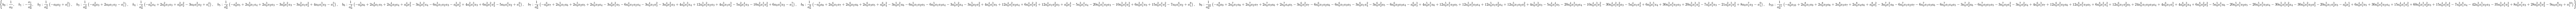

In [59]:
sols = solve(eqs, [b[i] for i in range(mv)])
sols

# convergence

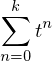

In [40]:
term = Sum(t**n, (n, 0, k))
term

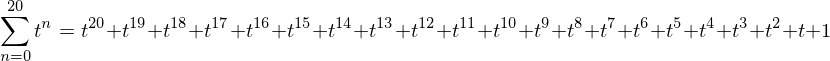

In [53]:
expanded = term.subs({k:20})
Eq(expanded, expanded.doit())

within convergence radious:

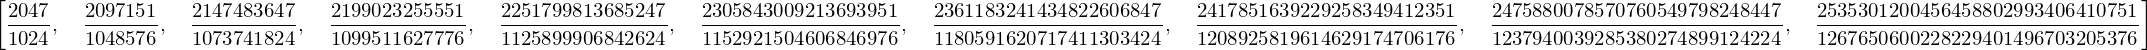

In [56]:
fracs = [term.subs({k:kv}).subs({t:Integer(1)/2}).doit() for kv in range(10, 101, 10)]
fracs

In [57]:
list(map(lambda frac: frac.evalf(), fracs))

In [47]:
limit(term.subs(t, Integer(1)/2), k, oo)

In [48]:
term.subs({k:oo, t:Integer(1)/2}).doit()

In [49]:
limit(term.subs(t, Integer(1)/4), k, oo)

the following summation yields a value; on the other hand, approaching it with `limit` doesn't:

In [51]:
term.subs({k:oo, t:-Integer(1)/4}).doit()

out of the convergence radious the `Sum` diverges:

In [52]:
limit(term.subs(t, 2), k, oo)

# compositions

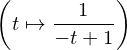

In [34]:
ones_fn

In [35]:
ones_fn(t**2).series(t, n=20)

In [36]:
ones_fn(t**3).series(t, n=20)

In [37]:
ones_fn(-t).series(t, n=20)

In [38]:
ones_fn(3*t).series(t, n=20)

In [39]:
gen_powers = ones_fn(k*t).series(t, n=20)
gen_powers

# exercises on inverses

## $(1-t)b(t)=1$

In [60]:
substitutions = {a[0]:1, a[1]:-1}
substitutions.update({a[i]:0 for i in range(2, 11)})
{b_key:v.subs(substitutions) for b_key, v in sols.items()}

## $\frac{1}{1-kt}b(t)=1$ where $k\in\mathbb{N}$

In [95]:
substitutions = {a[i]:gen_powers.coeff(t, n=i) for i in range(20) }
sols = solve([eq.subs(substitutions) for eq in eqs], [b[i] for i in range(11)])
sols

## $(1-t-t^{2})b(t)=1$

In [98]:
substitutions = {a[0]:1, a[1]:-1, a[2]:-1 }
substitutions.update({a[i]:0 for i in range(3, 11)})
sols = solve([eq.subs(substitutions) for eq in eqs], [b[i] for i in range(11)])
sols

## $(1-2t+t^{2})b(t)=1$

In [99]:
substitutions = {a[0]:1, a[1]:-2, a[2]:1 }
substitutions.update({a[i]:0 for i in range(3, 11)})
sols = solve([eq.subs(substitutions) for eq in eqs], [b[i] for i in range(11)])
sols

---
<a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License</a>.